<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/colab_15_2_Manual%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab Activity 15.2: Manual Gradient Descent

**Expected Time = 60 minutes**


This activity focuses on computing the minimum of a function using gradient descent.  Following the examples in the lectures, you will compare the effect of adjusting the step size and the starting point.  The beginning of the work was started in the last activity where one step of size 0.1 was taken.  In this assignment you will complete the work using the update formula provided in the lectures.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

#### Gradient Descent Formula

Below is the formula for the gradient descent algorithm.  In the formula below:

- $x_{prev}$: Defines the initial x-value
- $df$: Defines the derivative of function interested in optimizing
- $\alpha$: Defines the step size

These values are used to update the value of the previous $x$ as follows:

$$x_{next} = x_{prev} - \alpha * df(x_{prev})$$

Once updated, the $x_{next}$ becomes $x_{prev}$ and the process is repeated until a minimum is found.  

[Back to top](#-Index)

### Problem 1

#### Examining the Function

To begin, define a function $f(x) = x^2$ and a domain $x = [-2, 2]$ with 100 points.  


The function is plotted for you to identify whether a maximum or minimum value exists.



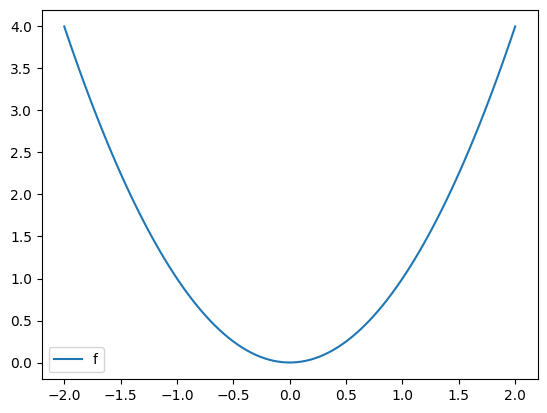

In [ ]:


def f(x):
  return x**2

x = np.linspace(-2,2,100)


# Answer check
plt.plot(x, f(x), label = 'f')
plt.legend();

[Back to top](#-Index)

### Problem 2

#### Taking a step



The function `df` below can be used to approximate the value of a derivative of $f$.


In the code cell below, assign the value of `0.1` to the variable `step_size`. Next, use the formula for gradient descent to compute the next value of $x$ given the starting point `x0`, the function `df`, and `step_size`.

$$x_{1} = x_{0} - \alpha * df(x_{0})$$

In [ ]:
def df(x):
  return (f(x + 0.00001) - f(x))/0.00001

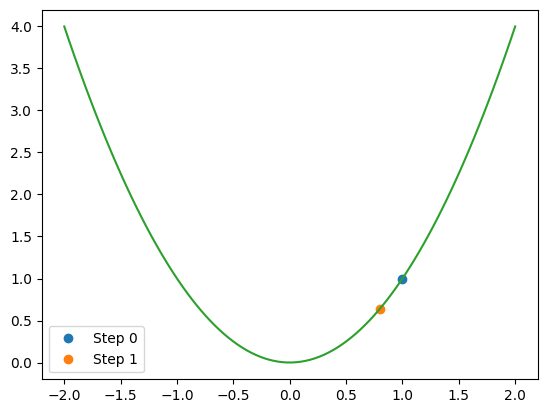

In [ ]:

x0 = 1
step_size = 0.1
x1 = x0 - step_size * df(x0)



# # Answer check
plt.plot(x0, f(x0), 'o', label = 'Step 0')
plt.plot(x1, f(x1), 'o', label = 'Step 1')
plt.plot(x, f(x))
plt.legend();

[Back to top](#-Index)

### Problem 3

#### Repeating the Process



In the code cell below, use a `for` loop with `50` iterations to update the values of $x$ using the gradiet descent formula. Store the values inside the list `xs`. For the derivative, use the `df` function defined previously and use a step size of `0.1`.



$$x_{next} = x_{prev} - \alpha * df(x_{prev})$$

In [ ]:

xs = [1]
def simple_gradient_descent(step_size, derivative_function):
  for i in range(50):
    current_x = xs[-1] # get the last one
    xs.append(current_x - step_size * derivative_function(current_x))

simple_gradient_descent(0.1, df)
print(len(xs)) #should be 51

51


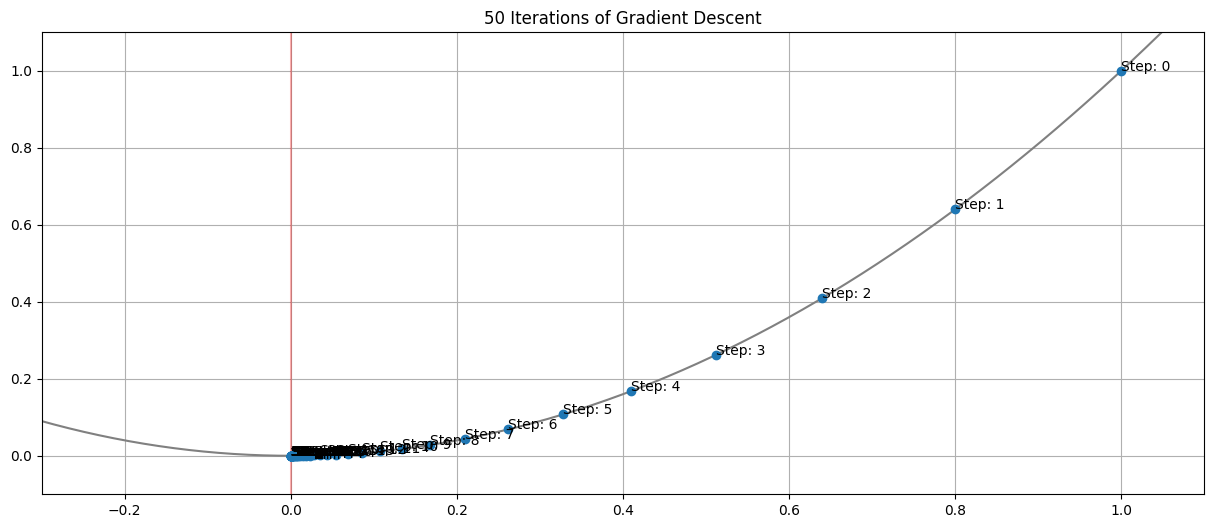

In [ ]:
x = np.linspace(-3, 3, 1000)
plt.figure(figsize = (15, 6))
for i, x0 in enumerate(xs):
  plt.text(x0, f(x0), f'Step: {i}');
plt.axvline(x0, color = 'red', alpha = 0.3)
plt.plot(x, f(x), color = 'gray')
plt.plot(xs, f(np.array(xs)), 'o')
plt.xlim(-.3, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('50 Iterations of Gradient Descent')
plt.grid();

[Back to top](#-Index)

### Problem 4

#### Adjusting the Step Size



Repeat the above process but this time use `step_size = 0.01`.  Again, compute 50 iterations of gradient descent tracking the updated values in the list `xs`.  What is different about the results this time?  

$$x_{next} = x_{prev} - \alpha * df(x_{prev})$$

In [ ]:

xs = [1]
simple_gradient_descent(0.01, df)

print(len(xs)) #should be 51
print([round(i, 2) for i in xs[-5:]])

51
[0.39, 0.39, 0.38, 0.37, 0.36]


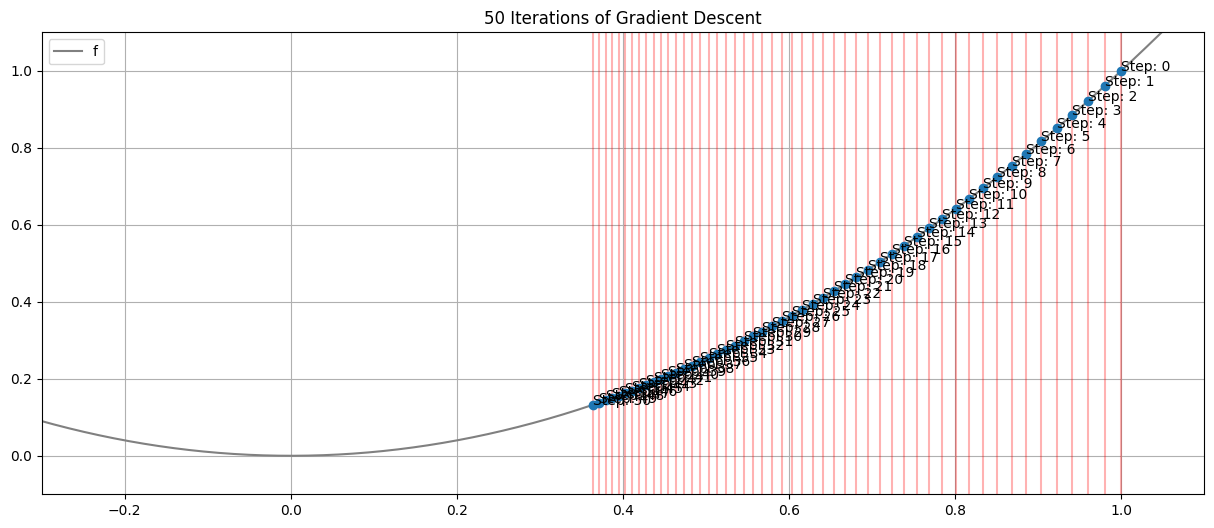

In [ ]:
x = np.linspace(-3, 3, 1000)
plt.figure(figsize = (15, 6))
for i, x0 in enumerate(xs):
  plt.text(x0, f(x0), f'Step: {i}');
  plt.axvline(x0, color = 'red', alpha = 0.3)
plt.plot(x, f(x), color = 'gray', label = 'f')
plt.plot(xs, f(np.array(xs)), 'o')
plt.xlim(-.3, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.title('50 Iterations of Gradient Descent')
plt.grid();

[Back to top](#-Index)

### Problem 5

#### Adjusting the starting value



Now, you are to examine the effect of changing the starting value. To demonstrate the effect of changing the starting point, consider instead the function

$$f(x) = x^2(x - 2)(x + 1)$$

Use gradient descent to examine the minimum value found with $x_0 = 2$ compared to that when $x_0 = -2$.  Which of the starting values locates the **absolute minimum** of the function $f(x)$?  Assign your solution as an integer to `best_start` below.

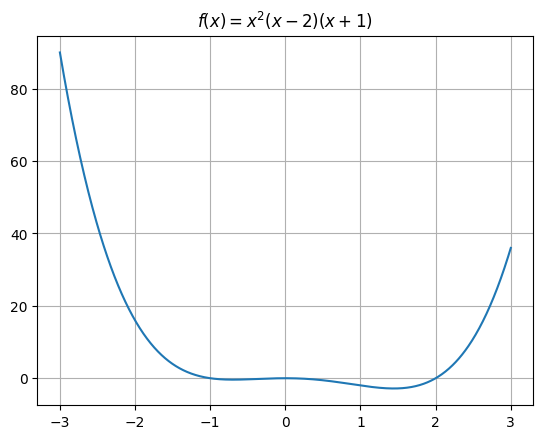

In [ ]:
def f(x):
  return x**2*(x - 2)*(x + 1)

plt.plot(x, f(x))
plt.title(r'$f(x) = x^2(x - 2)(x + 1)$')
plt.grid();

Minimum is at x = 


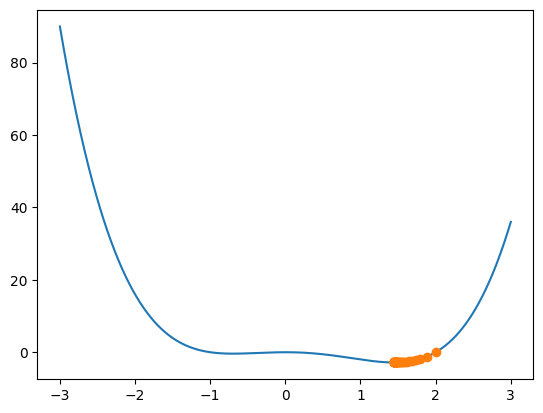

In [ ]:
def df2(x):
  return (f(x + 0.00001) - f(x))/0.00001
xs = [2]
simple_gradient_descent(0.01, df2)

best_start = 2



### ANSWER CHECK
print(f'Minimum is at x = {best_start}')
plt.plot(x, f(x))
plt.plot(xs, f(np.array(xs)), 'o')

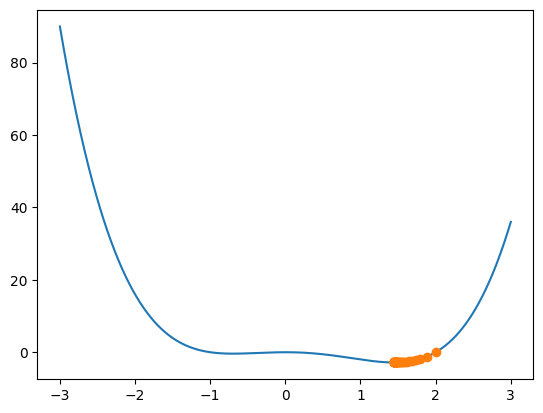

In [ ]:
plt.plot(x, f(x))
plt.plot(xs, f(np.array(xs)), 'o')

Now that you see the importance of both the starting value and step size parameter, consider looking for further refinements to the basic gradient descent model.  In the next activity, you will explore how to use gradient descent in identifying the parameters for a linear regression model.  Here, you will minimize the **MEAN SQUARED ERROR** function rather than an aribitrary polynomial.

# Evaluation of Colab Activity 15.2: Manual Gradient Descent (By Claude - Sonnet 3.7)

## Overview
This activity builds upon the previous introduction to gradient descent concepts and takes students through the practical implementation of the gradient descent algorithm to find minima of functions. The assignment guides students through implementing and experimenting with the core gradient descent update formula: x_next = x_prev - α * df(x_prev).

## Assessment of Completed Work

### Problem 1: Examining the Function
The student correctly defined the quadratic function f(x) = x² and created the appropriate domain for visualization. The plotted function clearly shows it has a minimum at x = 0.

### Problem 2: Taking a Step
The student accurately implemented the first step of gradient descent with a step size of 0.1, starting from x₀ = 1. The visualization confirms the algorithm is working as expected by showing both the starting point and the updated position after one step.

### Problem 3: Repeating the Process
The student correctly implemented a gradient descent loop for 50 iterations using a step size of 0.1. The visualization shows the convergence pattern toward the function's minimum. The code creates and properly updates the list of x-values at each iteration, and the length check confirms all 51 values are present (initial value plus 50 iterations).

### Problem 4: Adjusting the Step Size
The student repeated the gradient descent process with a smaller step size of 0.01 and noted the difference in convergence behavior. The visualization clearly shows that with the smaller step size, the algorithm takes smaller steps and converges more slowly toward the minimum.

### Problem 5: Adjusting the Starting Value
The student explored how different starting points affect convergence by using a more complex function f(x) = x²(x-2)(x+1). The student chose to start at x₀ = 2 and correctly implemented gradient descent for this function. The visualization confirms the algorithm's behavior and shows the identified minimum.

## Significance of the Learning

This assignment is particularly valuable for developing practical machine learning skills for several reasons:

1. **Algorithm Implementation**: Students gain hands-on experience implementing gradient descent, one of the fundamental optimization algorithms in machine learning, from scratch.

2. **Hyperparameter Sensitivity**: By experimenting with different step sizes (learning rates), students develop intuition about how this critical hyperparameter affects convergence speed and stability.

3. **Initial Conditions**: By exploring different starting points, students learn that gradient descent is sensitive to initialization and may converge to different local minima depending on where the algorithm starts.

4. **Visualization of Convergence**: The plotting exercises help build intuition about how gradient descent navigates the loss landscape to find minima.

5. **Practical Considerations**: The exercises highlight important practical considerations when implementing gradient descent, such as selecting appropriate step sizes and initializations.

These concepts are directly applicable to training machine learning models where gradient descent is used to minimize loss functions. Understanding these fundamentals is essential for:

- Selecting appropriate learning rates in neural networks
- Recognizing and addressing convergence issues
- Implementing strategies to escape local minima
- Debugging optimization problems in complex models
- Customizing optimization algorithms for specific problems

The final note about the next activity connecting this to minimizing mean squared error in linear regression provides an excellent bridge to practical machine learning applications, showing how this fundamental algorithm forms the backbone of more complex modeling tasks.

Overall, this assignment effectively builds the student's intuition and practical skills for optimization in machine learning contexts.